# <b>Симуляция ПАВ в двумерном растворе</b>

В этой работе исследовалась зависимость энергий системы от энергий связи молекул для двумерных ПАВ в растворе. Для этого используются расчеты с помощью LAMPPS. 

In [60]:
from ase.io import read
from ase.visualize import view
import nglview
import pickle
import pandas as pd
import plotly.express as px

### <b>Расчеты</b>

Подготовка начальных условий: это пример <b>micelle</b> из основных примеров идущих в LAMMPS, но <b>коэффициенты энергии</b> всех связей <i>(как и внутри молекул так и между раствором и ПАВ)</i> изменены в соответствии со значением.

##### Посмотрим результат расчетов для коэффициента \$0.2$ с помощью nglview:

In [32]:
#reading with no pickle
data1 = read('logsndumps/0.2.dump', index = ':')
with open ('pickles/0.2.pickle', 'wb') as f:
    pickle.dump(data1, f)

In [36]:
#reading from pickle
with open ('pickles/0.2.pickle', 'rb') as f:
    data1 = pickle.load(f)

In [37]:
w1 = nglview.show_asetraj(data1, gui = True)
w1.clear_representations()
w1.add_representation('ball+stick', selection='_H', color='white')
w1.add_representation('ball+stick', selection='_Be', color='pink')
w1.add_representation('ball+stick', selection='_Li', color='#ECACF2')
w1.add_representation('ball+stick', selection='_He', color='yellow')
w1

NGLWidget(max_frame=500)

##### Теперь для коэффициента \$1.3$:

In [43]:
#reading with no pickle
data2 = read('logsndumps/1.3.dump', index = ':')
with open ('pickles/1.3.pickle', 'wb') as f:
    pickle.dump(data2, f)

In [40]:
#reading from pickle
with open ('pickles/1.3.pickle', 'rb') as f:
    data2 = pickle.load(f)

In [27]:
w2 = nglview.show_asetraj(data2, gui = True)
w2.clear_representations()
w2.add_representation('ball+stick', selection='_H', color='white')
w2.add_representation('ball+stick', selection='_Be', color='pink')
w2.add_representation('ball+stick', selection='_Li', color='#ECACF2')
w2.add_representation('ball+stick', selection='_He', color='yellow')
w2

NGLWidget(max_frame=500)

##### Код для показа любого коэффициента (от $0.2$ до $1.3$ с шагом $0.1$)

In [28]:
#reading with no pickle
num=input('Коэффициент: ')
data3 = read('logsndumps/'+num+'.dump', index = ':')
w3 = nglview.show_asetraj(data3, gui = True)
w3.clear_representations()
w3.add_representation('ball+stick', selection='_H', color='white')
w3.add_representation('ball+stick', selection='_Be', color='pink')
w3.add_representation('ball+stick', selection='_Li', color='#ECACF2')
w3.add_representation('ball+stick', selection='_He', color='yellow')
w3

Коэффициент:  0.7


NGLWidget(max_frame=500)

In [42]:
#reading from pickle
num=input('Коэффициент: ')
with open (num+'.pickle', 'rb') as f:
    data3 = pickle.load(f)
w3 = nglview.show_asetraj(data3, gui = True)
w3.clear_representations()
w3.add_representation('ball+stick', selection='_H', color='white')
w3.add_representation('ball+stick', selection='_Be', color='pink')
w3.add_representation('ball+stick', selection='_Li', color='#ECACF2')
w3.add_representation('ball+stick', selection='_He', color='yellow')
w3

Коэффициент:  0.2


NGLWidget(max_frame=500)

### <b>Результаты</b>

In [85]:
dfs = []
for num in ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3']:
    df = pd.read_csv("logsndumps/"+num+".txt")
    df.drop('Step', inplace=True, axis=1)
    dfs.append(df.mean(axis = 0))
dat = pd.concat(dfs, keys=['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3'], axis = 1)

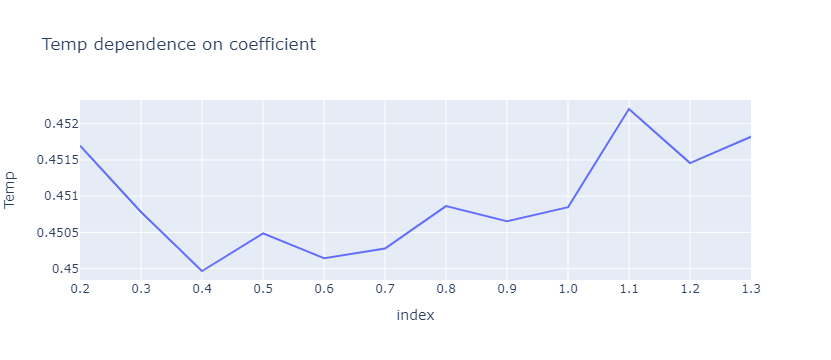

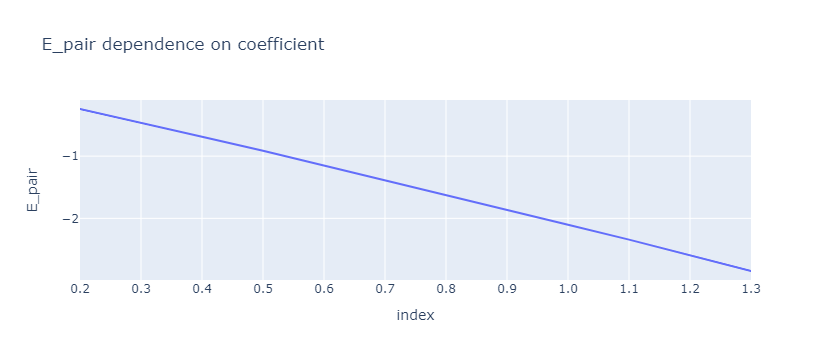

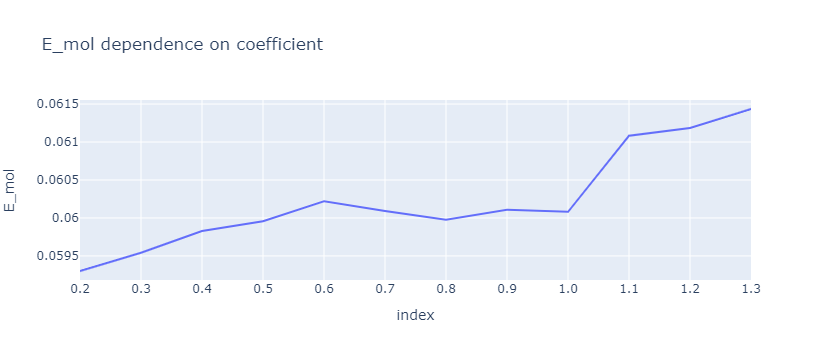

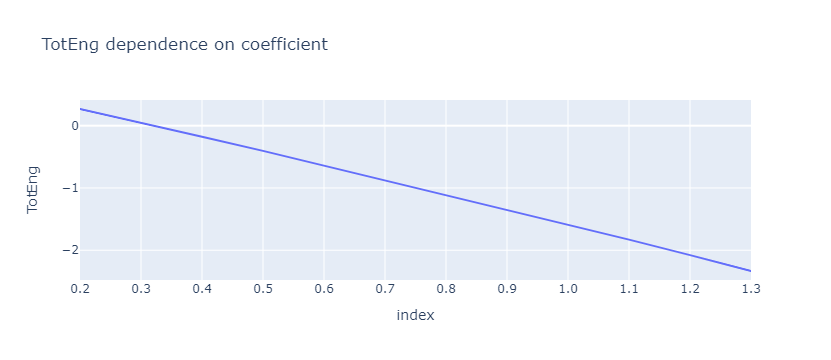

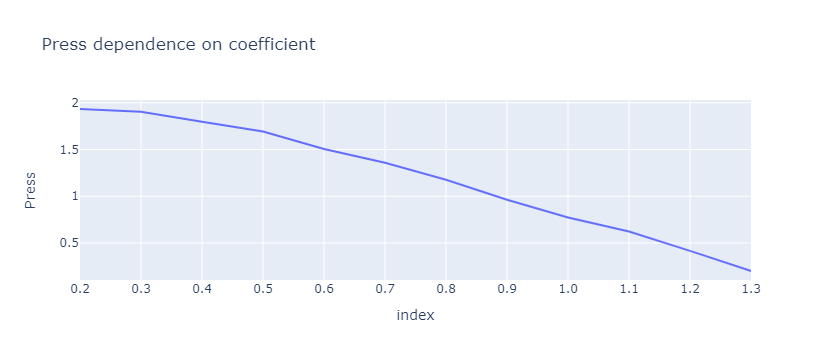

In [86]:
for param in ['Temp','E_pair','E_mol','TotEng','Press']:
    #print(param)
    tmp = dat.loc[[param], :].T.reset_index().T
    #print(tmp)
    fig = px.line(tmp.T, x="index", y=param, title=param+" dependence on coefficient")
    fig.show()